# **Quantum Algorithms**

## **Bernstein - Vazirani Algorithm**

##### *Complete Implementation (More automatic & adaptive)*

Installation of necessary packages

In [ ]:
!pip install qiskit
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 6.2 MB/s 
     |████████████████████████████████| 18.0 MB 23.8 MB/s 
     |████████████████████████████████| 240 kB 63.5 MB/s 
     |████████████████████████████████| 112 kB 76.7 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 943 kB 66.2 MB/s 
     |████████████████████████████████| 49 kB 7.1 MB/s 
     |████████████████████████████████| 1.6 MB 53.3 MB/s 
     |████████████████████████████████| 37.5 MB 76 kB/s 
     |████████████████████████████████| 49 kB 7.8 MB/s 
     |████████████████████████████████| 4.0 MB 48.2 MB/s 
     |████████████████████████████████| 112 kB 92.5 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.2-py3-none-any.whl size=12109 sha256=588198f264b2d57519a090cbd1cfab905c3a027875551f9c0ce8debac57daf0e
  Stored in directory: /root/.cache/pip/wheels/e6/bd/f3/26c31

Installation and importing of libraries

In [ ]:
from qiskit import *

In [ ]:
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

Firstly, we choose a 7-bit secret number that we want to guess.

In [ ]:
secretNumber = '10101010100'

We create a quantum circuit that has automatically calculated the qubits (length + 1) and the classical bits to measure them

In [ ]:
circuit = QuantumCircuit(len(secretNumber) + 1, len(secretNumber))

1. We apply $h$ in all qubits and $not$ for the helper qubit and then we apply $h$ on it. We do that by using range()
2. We draw a barrier for better depiction.
3. We apply the $cnot$ (it flips the state) gate between the qubit that will have the value of 1 and the helper qubit. This is important because we want to have a qubit ordering of the secret number so we need to flip the qubits that will have the value of 1. For this, we use a for-loop. Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object.
4. We draw a barrier again.
5. We apply the $h$ in order to be able to measure them later.
6. We draw another barrier.
7. Finally, we will measure those qubits and we put their values in the classical bits.

Note: If we didn't have the helper qubit, we would have a 50% chance of finding the secret number.
So, if we comment out the helper qubit and add more shots in the simulator, we will be able to see the 2 possible guesses.

In [ ]:
# Step 1
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

# Step 2
circuit.barrier()

# Step 3
for index, one in enumerate(reversed(secretNumber)):
    print(f"index {index} is {one}")
    if one == "1":
        circuit.cx(index,len(secretNumber))

# Step 4
circuit.barrier()

# Step 5
circuit.h(range(len(secretNumber)))

# Step 6
circuit.barrier()

# Step 7
circuit.measure(range(len(secretNumber)), range(len(secretNumber)))

index 0 is 0
index 1 is 0
index 2 is 1
index 3 is 0
index 4 is 1
index 5 is 0
index 6 is 1
index 7 is 0
index 8 is 1
index 9 is 0
index 10 is 1


Now we can see our circuit by running the following cell.

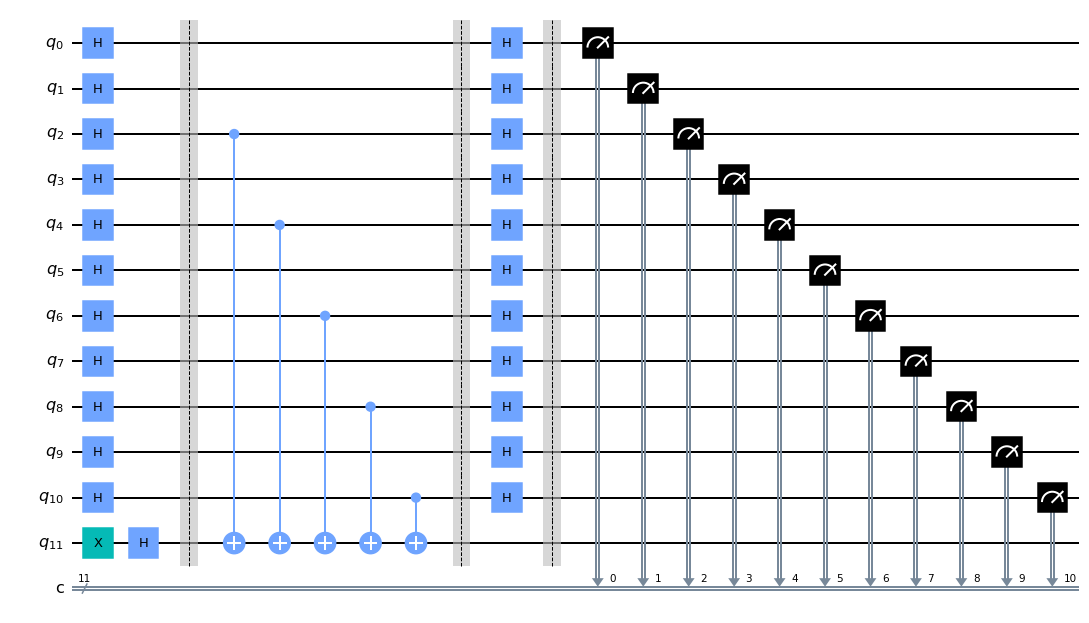

In [ ]:
circuit.draw(output='mpl')

In this cell, we run the circuit in the simulator. Also we can get the counts from this measurement.

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'10101010100': 1}


Lastly, a histogram that depicts the probabilities.

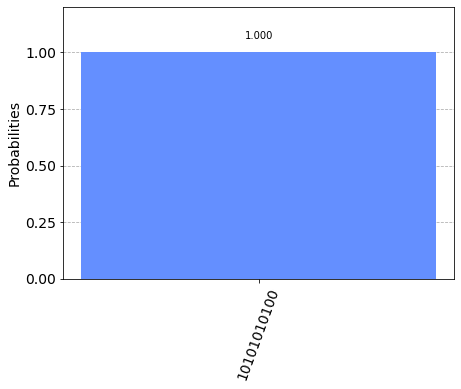

In [ ]:
plot_histogram([counts])

### A Game Application of this algorithm

In [ ]:
secret_number = input("Enter a secret number \n")
try:
	secret_number = bin(int(secret_number))[2:]
except:
	print("you should give an integer")
	exit(0)

qubit_number = len(secret_number)

circuit = QuantumCircuit(qubit_number+1,qubit_number)
circuit.h(range(qubit_number))
circuit.x(qubit_number)
circuit.h(qubit_number)

for index, one in enumerate(reversed(secret_number)):
    if one == "1":
        circuit.cx(index,qubit_number)

circuit.h(range(qubit_number))
circuit.measure(range(qubit_number),range(qubit_number))

simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
listOfCounts = list(counts.keys())
integer_number = int(listOfCounts[0],2)

print(f"Your secret number is {integer_number} and it took only 1 shot to guess this in Quantum Computer. It would take {qubit_number} shots in classical computers.")


Enter a secret number 
10
Your secret number is 10 and it took only 1 shot to guess this in Quantum Computer. It would take 4 shots in classical computers.
